### Importing Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

### Import the Dataset

In [6]:
gold_data = pd.read_csv('./gld_price_data.csv')

### Print First 5 Rows

In [7]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


### Print Last 5 Rows

In [8]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


### Number of Rows and Columns

In [9]:
gold_data.shape

(2290, 6)

### Basic Information About the Dataset

In [10]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


### Number of the Missing Values

In [11]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

### Statistical Measures of the Dataset 

In [12]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


### Correlation
<ul>
    <li>Positive</li>
    <li>Negative</li>
</ul>

In [13]:
correlation = gold_data.drop(['Date'],axis=1).corr()

### Heatmap

<Axes: >

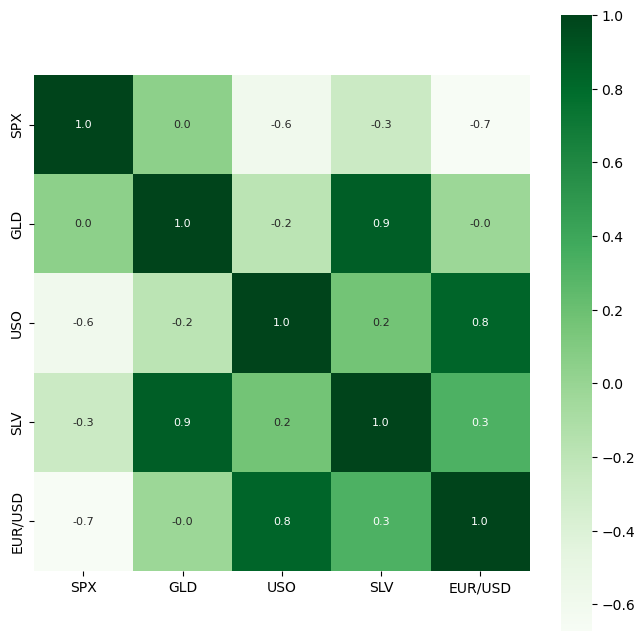

In [14]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')

### Correlation Values of GLD

In [15]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


### Check Distribution of GLD Price

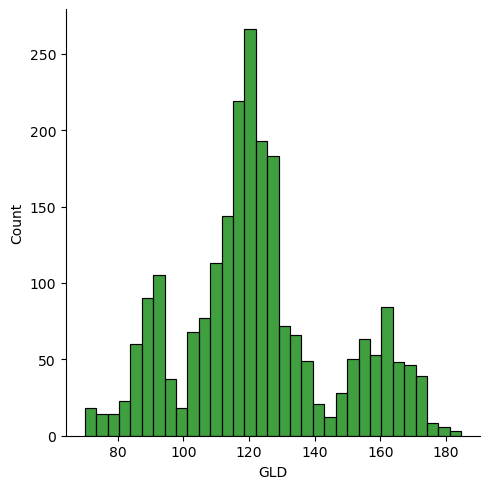

In [16]:
sns.displot(gold_data['GLD'], color='green')

### Splitting Features and Target

In [17]:
X = gold_data.drop(['Date','GLD'], axis=1)
Y = gold_data['GLD']

In [18]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [19]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


### Split the Dataset into Training and Testing

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

### Model Training
- Random Forest Regression

In [21]:
regressor = RandomForestRegressor(n_estimators = 100)

### Train the Model

In [22]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

### Model Evaluation

Predication

In [23]:
test_data_predication = regressor.predict(X_test)

In [24]:
print(test_data_predication)

[168.73399951  81.90529993 116.21560038 127.57070029 120.75780124
 154.69619715 150.45019816 126.07320052 117.5159989  125.91960067
 116.5043015  171.40350126 141.24739815 167.95269881 115.29040027
 117.65880058 137.94060272 170.15660071 160.02380314 159.75589928
 155.22650065 125.36880023 175.95160025 157.25230349 125.26430043
  94.05359975  77.08290028 120.03250021 119.03209924 167.5097995
  88.12870089 125.39429998  91.16360092 117.56530011 121.1894992
 136.02390069 115.6779014  114.93990072 147.60489915 107.34280068
 104.92810246  87.18399776 126.62690049 117.5961998  152.03839895
 119.48760036 108.52229959 107.97199826  93.16060044 127.15669737
  75.18910016 113.5986992  121.37520004 111.20269904 118.85559884
 120.76679937 159.77819973 166.95890194 146.96419706  85.78289831
  94.4617001   86.8639988   90.47329988 118.83840101 126.45060106
 127.70510021 169.81220086 122.24299896 117.2910992   98.54920049
 168.41910098 142.77629904 131.81500293 121.22840215 121.0474993
 119.74050045

### R Squared Error

In [25]:
error_score = metrics.r2_score(Y_test, test_data_predication)
print("R Squared Error : ", error_score)

R Squared Error :  0.9891064798179917


### Visualize Comparison Between Actual and Predicated Values

In [26]:
Y_test = list(Y_test)

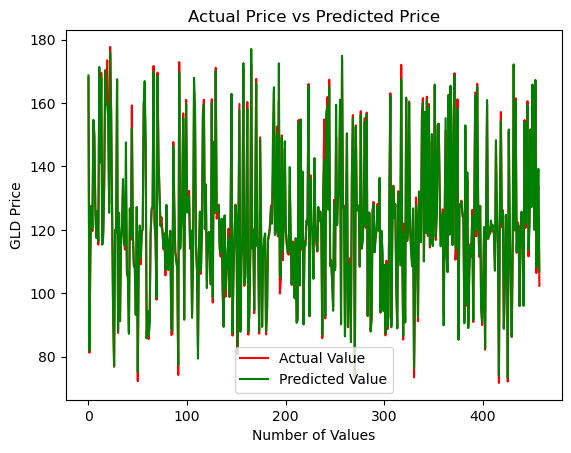

In [27]:
plt.plot(Y_test, color='red', label='Actual Value')
plt.plot(test_data_predication, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

### USE KNN Model

In [28]:
knn_model = KNeighborsRegressor(n_neighbors=5)

### Train The Model

In [29]:
knn_model.fit(X_train, Y_train)

KNeighborsRegressor()

### Make Predication

In [30]:
knn_predictions = knn_model.predict(X_test)

### Evaluate the model

In [31]:
mse = mean_squared_error(Y_test, knn_predictions)
r2 = r2_score(Y_test, knn_predictions)

print("Mean Squared Error:", mse)
print("R Squared Error:", r2)

Mean Squared Error: 34.86469067219383
R Squared Error: 0.9338987197131254


### Visualization: Actual vs Predicted

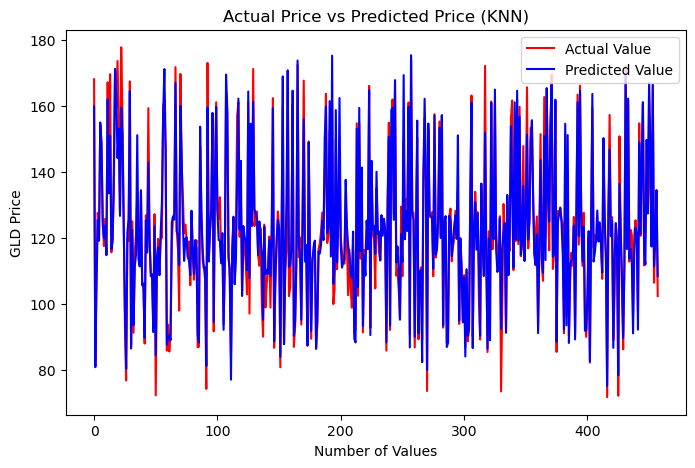

In [32]:
plt.figure(figsize=(8, 5))
plt.plot(list(Y_test), color='red', label='Actual Value')
plt.plot(knn_predictions, color='blue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price (KNN)')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()